In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
df = pd.read_csv("../data/A_Z Handwritten Data.csv")

In [4]:
arr = df.iloc[:,1:].to_numpy()
labels = df.iloc[:,:1].to_numpy().reshape(len(df))

data_train, data_test, labels_train, labels_test = train_test_split(arr, labels, test_size=0.20, random_state=42)

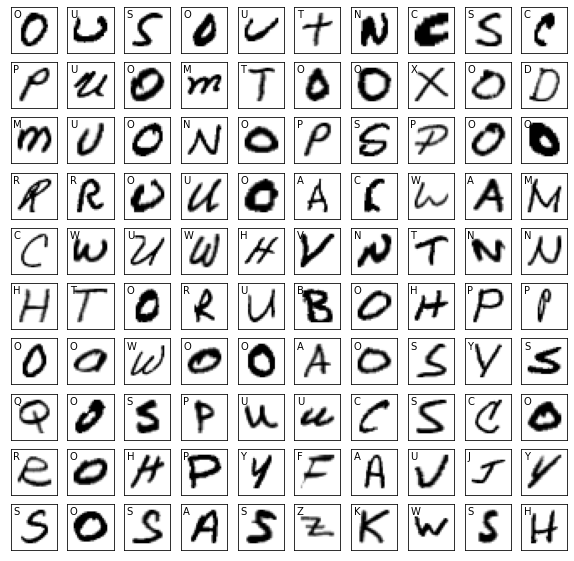

In [8]:
data_train = data_train.reshape(len(labels_train),28,28,1)
data_test = data_test.reshape(len(labels_test),28,28,1)

labels_dict = {0:"A", 1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",10:"K",
               11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S", 19:"T",20:"U",21:"V",22:"W",23:"X",24:"Y",25:"Z",}

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(data_train.shape[0])
    col.imshow(data_train[i], cmap='gray_r')
    col.text(1,6,labels_dict[labels_train[i]],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [9]:
data_train = data_train/255
data_test = data_test/255

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(26, activation='softmax')
])

model.compile(
        optimizer=keras.optimizers.RMSprop(epsilon=1e-08), 
        loss='categorical_crossentropy', 
        metrics=['acc']
)

In [10]:
model.fit(data_train, labels_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\engine\training.py", line 810, in train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\losses.py", line 1665, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "c:\Users\rifle\Documents\My Docs\Projects\OCR-Webapp\venv\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 26) are incompatible


In [7]:
test_loss, test_acc = model.evaluate(data_test, labels_test, verbose = 1)

2328/2328 [==============================] - 3s 1ms/step - loss: 0.0781 - accuracy: 0.9799


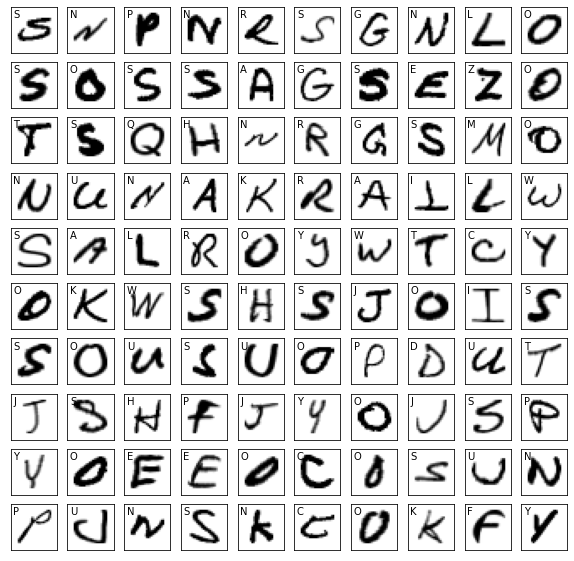

In [8]:
predictions = model.predict(data_test)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(labels_test.shape[0])
    col.imshow(data_test[i], cmap='gray_r')
    col.text(1,6,labels_dict[np.argmax(predictions[i])],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [9]:
model.save('model.h5')